**Import Library Neccessary**

In [157]:
import numpy as np
import pandas as pd
import os 

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

In [159]:
df = pd.read_csv(r"C:\Users\Admin\Desktop\MH\DATK\predictive_maintenance2.csv")

In [160]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


**Machine Predictive Maintenance Classification Dataset**

Since real predictive maintenance datasets are generally difficult to obtain and particularly difficult to publish, we present a synthetic dataset that reflects real predictive maintenance scenarios encountered in the industry, to the best of our knowledge.

The dataset consists of **10,000 data points** stored as rows, with **14 features** in columns:

- **UID**: A unique identifier ranging from 1 to 10,000.
- **productID**: Consists of a letter `L`, `M`, or `H` for low (50% of all products), medium (30%), and high (20%) product quality variants, along with a variant-specific serial number.
- **air temperature [K]**: Generated using a random walk process, later normalized to a standard deviation of 2 K around 300 K.
- **process temperature [K]**: Generated using a random walk process, normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
- **Rotational speed**: Calculated from power of 2860 W, overlaid with a normally distributed noise.
- **Torque**: Torque values are normally distributed around 40 Nm with a standard deviation (σ) of 10 Nm, ensuring no negative values.
- **Tool wear**: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process.

The dataset also contains a **machine failure** label that indicates whether the machine has failed at this particular data point. Machine failure is determined by any of the following failure modes.

**Important**: There are two target variables – do not make the mistake of using one of them as a feature, as this will lead to data leakage.

- **Target**: Failure or Not
- **Failure Type**: Type of failure
Type of Failure

**Delete Columns Don't Use**

In [161]:
df = df.drop(["UDI","Product ID"], axis =1)
df.head(20)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure
5,M,298.1,308.6,1425,41.9,11,0,No Failure
6,L,298.1,308.6,1558,42.4,14,0,No Failure
7,L,298.1,308.6,1527,40.2,16,0,No Failure
8,M,298.3,308.7,1667,28.6,18,0,No Failure
9,M,298.5,309.0,1741,28.0,21,0,No Failure


**Convert from K to C**

In [162]:
df["Air temperature [K]"] = df["Air temperature [K]"] - 272.15
df["Process temperature [K]"] = df["Process temperature [K]"] - 272.15
df["Diff_temperature"] = df["Process temperature [K]"] - df["Air temperature [K]"] 
df.rename(columns={"Air temperature [K]":"Air_temperature","Process temperature [K]":"Process_temperature","Rotational speed [rpm]":"Rotational_speed", 
          "Torque [Nm]":"Torque","Tool wear [min]":"Tool_wear","Failure Type":"Failure_Type"},
          inplace= True)
df.head(10)

,Type,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Target,Failure_Type,Diff_temperature
0,M,25.95,36.45,1551,42.8,0,0,No Failure,10.5
1,L,26.05,36.55,1408,46.3,3,0,No Failure,10.5
2,L,25.95,36.35,1498,49.4,5,0,No Failure,10.4
3,L,26.05,36.45,1433,39.5,7,0,No Failure,10.4
4,L,26.05,36.55,1408,40.0,9,0,No Failure,10.5
5,M,25.95,36.45,1425,41.9,11,0,No Failure,10.5
6,L,25.95,36.45,1558,42.4,14,0,No Failure,10.5
7,L,25.95,36.45,1527,40.2,16,0,No Failure,10.5
8,M,26.15,36.55,1667,28.6,18,0,No Failure,10.4
9,M,26.35,36.85,1741,28.0,21,0,No Failure,10.5


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type                 10000 non-null  object 
 1   Air_temperature      10000 non-null  float64
 2   Process_temperature  10000 non-null  float64
 3   Rotational_speed     10000 non-null  int64  
 4   Torque               10000 non-null  float64
 5   Tool_wear            10000 non-null  int64  
 6   Target               10000 non-null  int64  
 7   Failure_Type         10000 non-null  object 
 8   Diff_temperature     10000 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 703.3+ KB


In [164]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

<Axes: >

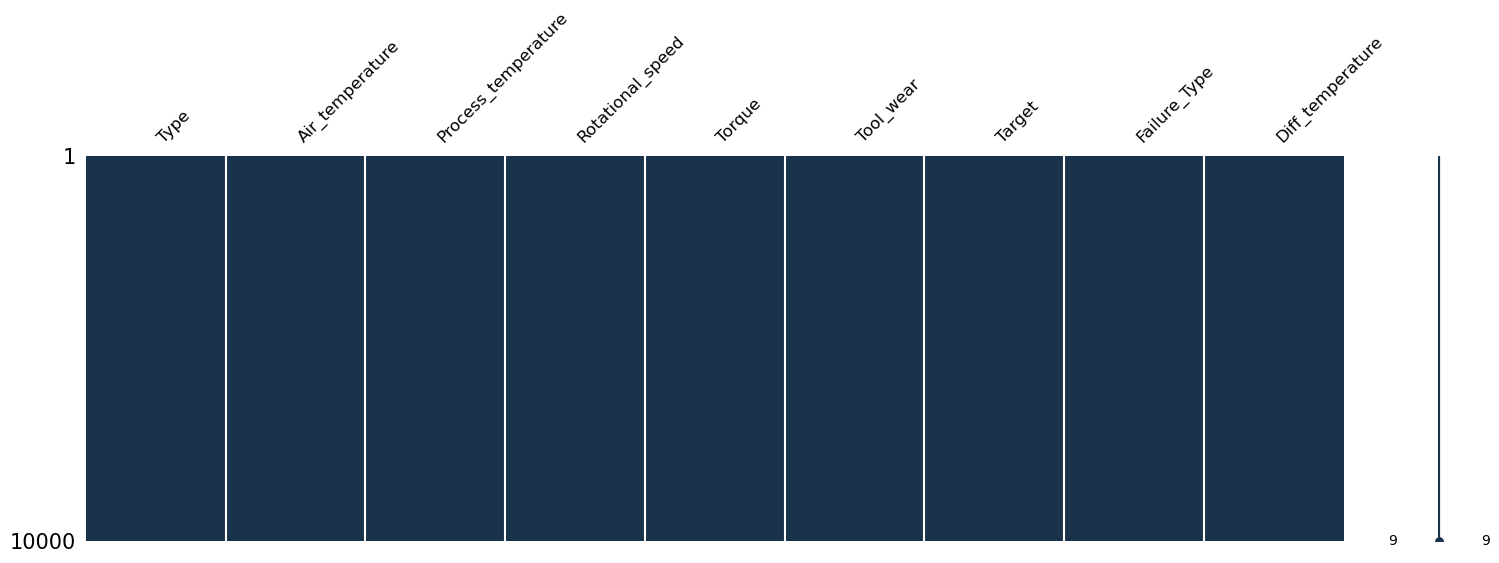

In [165]:
import missingno as msno
msno.matrix(df, figsize=(18,5), fontsize=12, color = (0.1,0.2,0.3), label_rotation = 45)


**NX**
No missing value exist

In [166]:
help(sns.displot)

Help on function displot in module seaborn.distributions:

displot(data=None, *, x=None, y=None, hue=None, row=None, col=None, weights=None, kind='hist', rug=False, rug_kws=None, log_scale=None, legend=True, palette=None, hue_order=None, hue_norm=None, color=None, col_wrap=None, row_order=None, col_order=None, height=5, aspect=1, facet_kws=None, **kwargs)
    Figure-level interface for drawing distribution plots onto a FacetGrid.

    This function provides access to several approaches for visualizing the
    univariate or bivariate distribution of data, including subsets of data
    defined by semantic mapping and faceting across multiple subplots. The
    ``kind`` parameter selects the approach to use:

    - :func:`histplot` (with ``kind="hist"``; the default)
    - :func:`kdeplot` (with ``kind="kde"``)
    - :func:`ecdfplot` (with ``kind="ecdf"``; univariate-only)

    Additionally, a :func:`rugplot` can be added to any kind of plot to show
    individual observations.

    Extra k

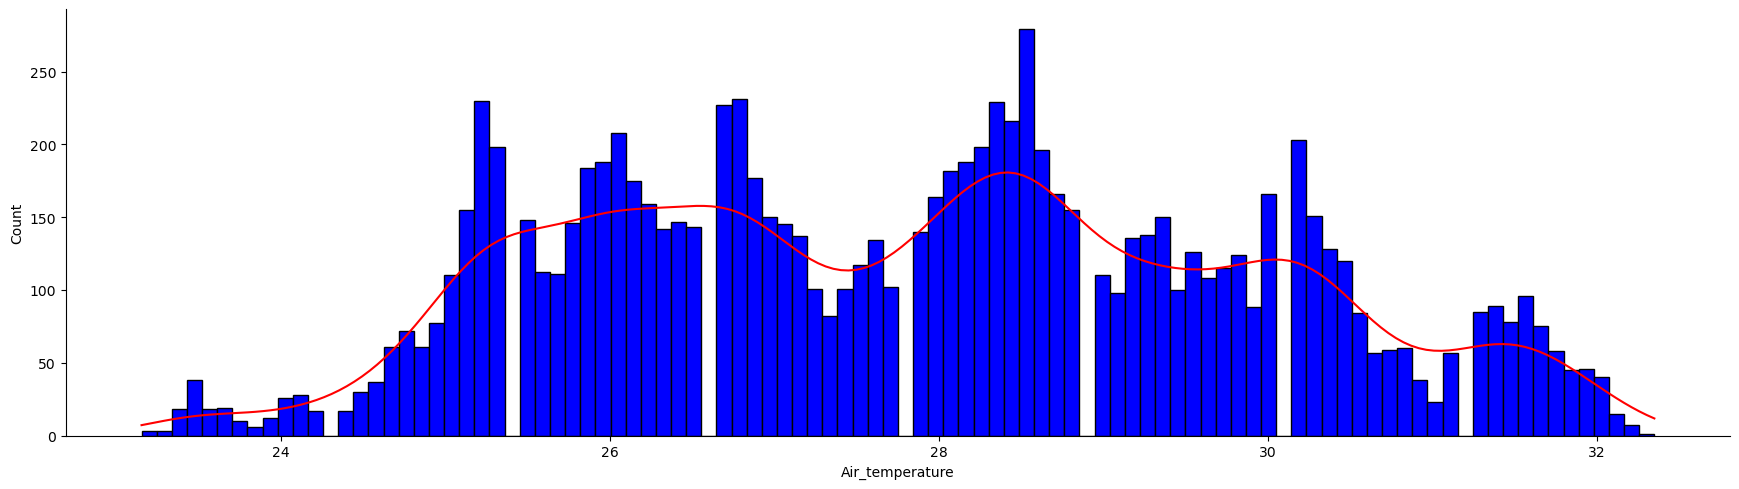

In [168]:
sns.displot(data=df, x="Air_temperature", kde=True, bins = 100,color = "red", facecolor = "blue",height = 5, aspect = 3.5);

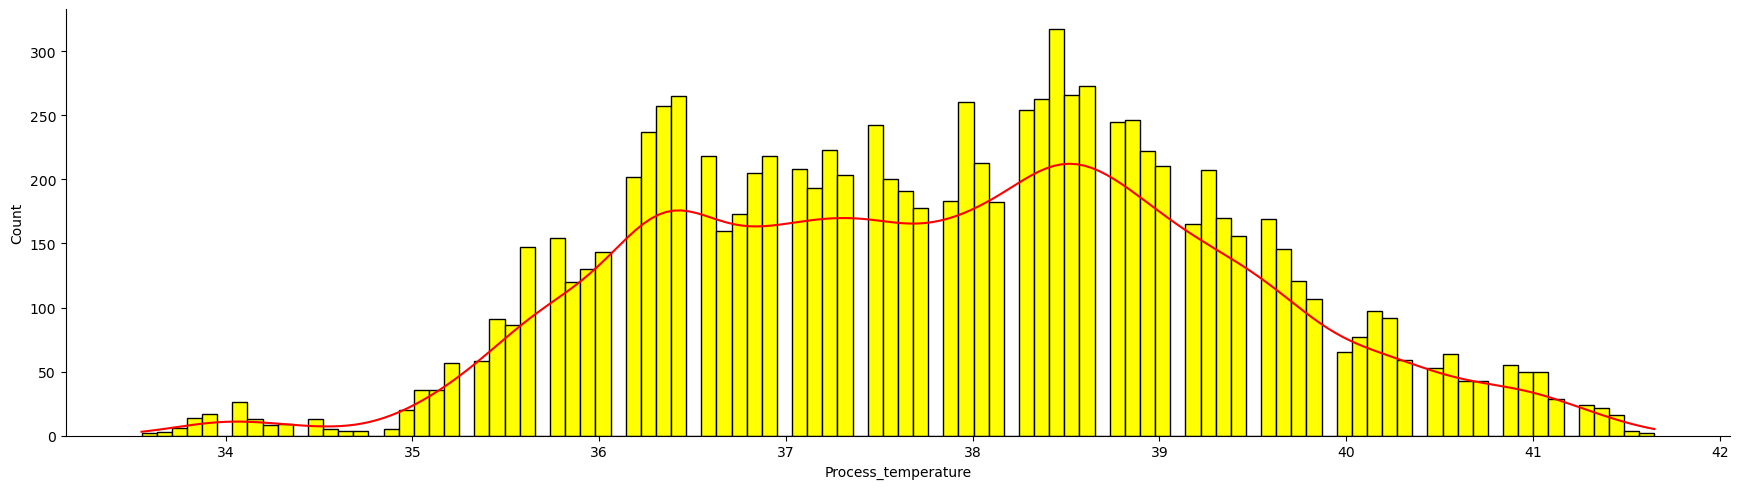

In [169]:
sns.displot(data=df, x="Process_temperature", kde=True, bins = 100,color = "red", facecolor = "yellow",height = 5, aspect = 3.5);

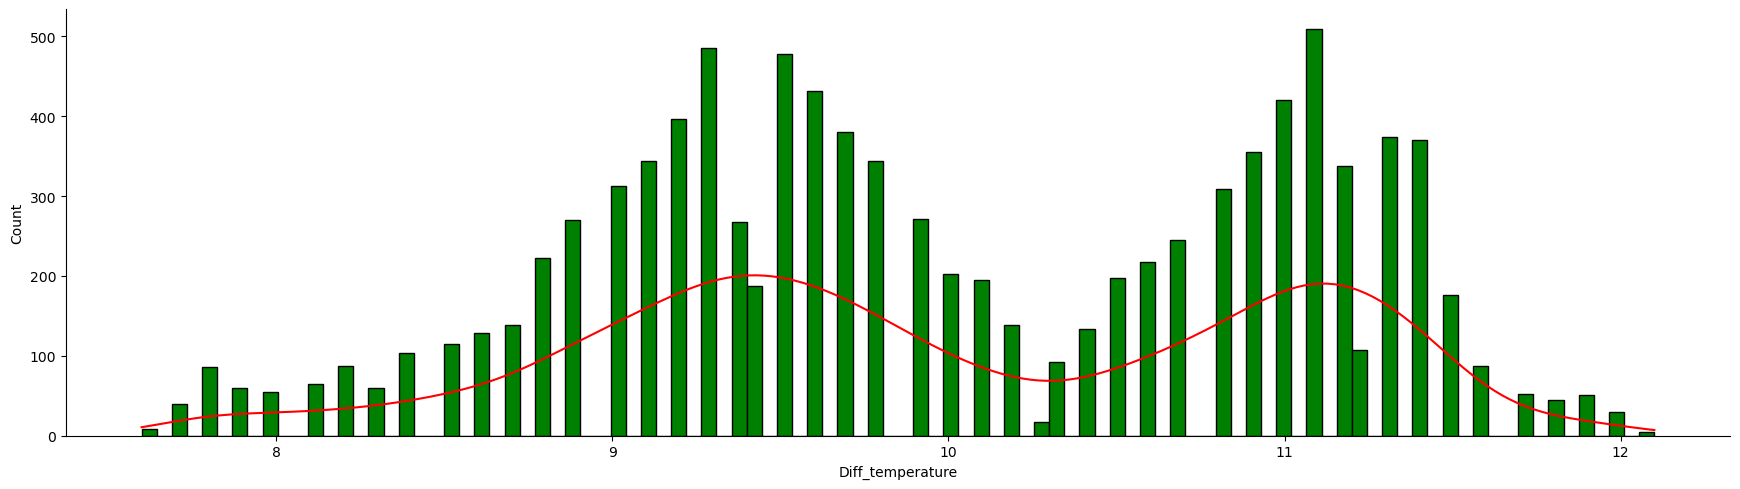

In [170]:
sns.displot(data=df, x="Diff_temperature", kde=True, bins = 100,color = "red", facecolor = "green",height = 5, aspect = 3.5);

Text(0.5, 1.0, 'Type')

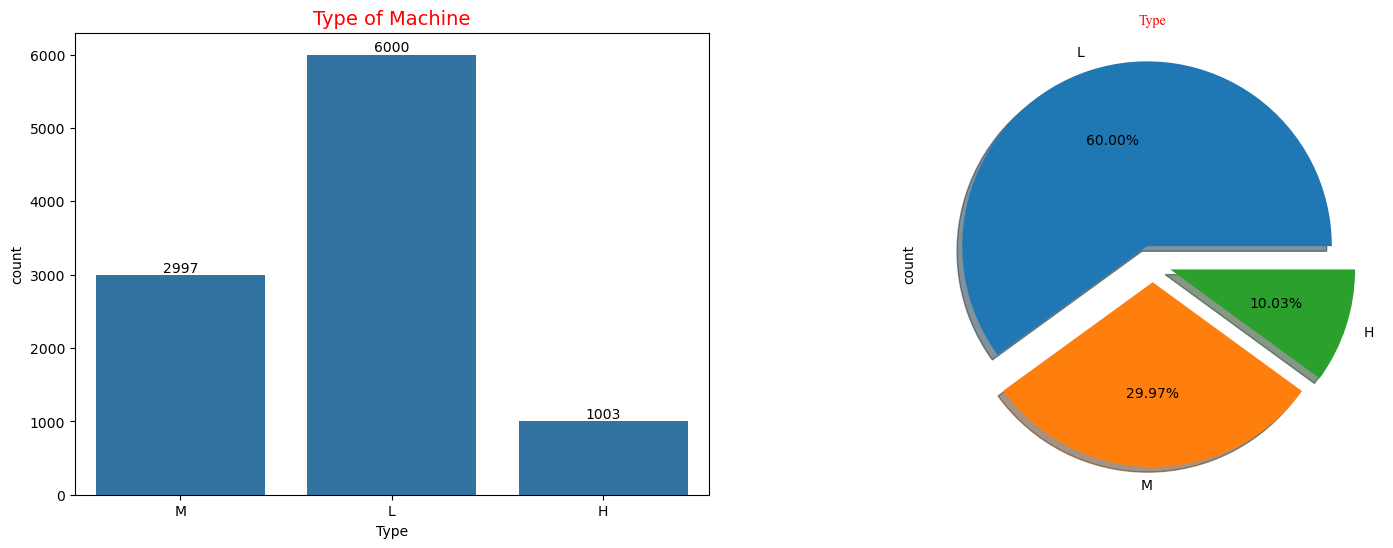

In [171]:
ax = plt.figure(figsize=(18,6)) # Create Size 18x6

#Draw count chart column
ax = plt.subplot(1,2,1) # Create Frame is sized by 1 row and 2 columns and select 1
ax = sns.countplot(x='Type', data = df)
ax.bar_label(ax.containers[0]) #ADD label of count in Top of Chart
plt.title("Type of Machine", fontsize=14, color="Red")

#Draw pie chart
ax = plt.subplot(1,2,2)
ax=df['Type'].value_counts().plot.pie(explode=[0.1, 0.1,0.1],autopct='%1.2f%%',shadow=True)
ax.set_title(label = "Type", fontsize = 20,color='Red',font='Times New Roman')


Text(0.5, 1.0, 'Target')

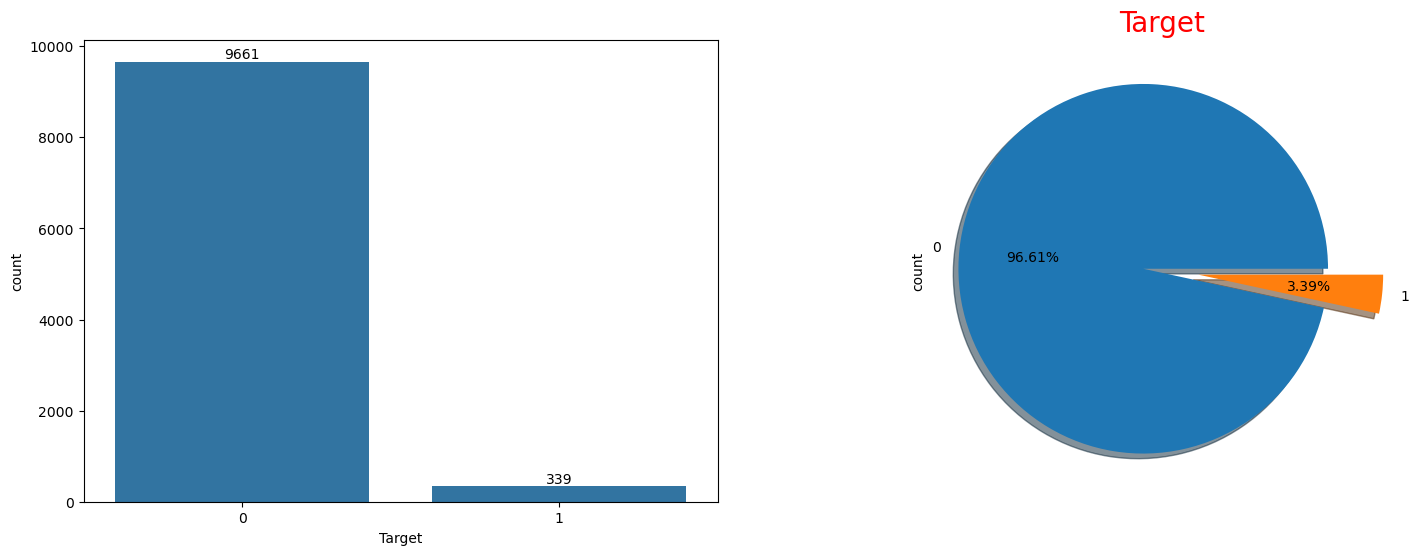

In [172]:
ax = plt.figure(figsize=(18,6))
#Draw count chart column
ax = plt.subplot(1,2,1)
ax = sns.countplot(x="Target", data= df)
ax.bar_label(ax.containers[0]) #ADD label of count in Top of Chart

#Draw pie chart
ax = plt.subplot(1,2,2)
ax=df['Target'].value_counts().plot.pie(explode=[0.1, 0.2],autopct='%1.2f%%',shadow=True)
ax.set_title(label = "Target", fontsize = 20,color='Red')

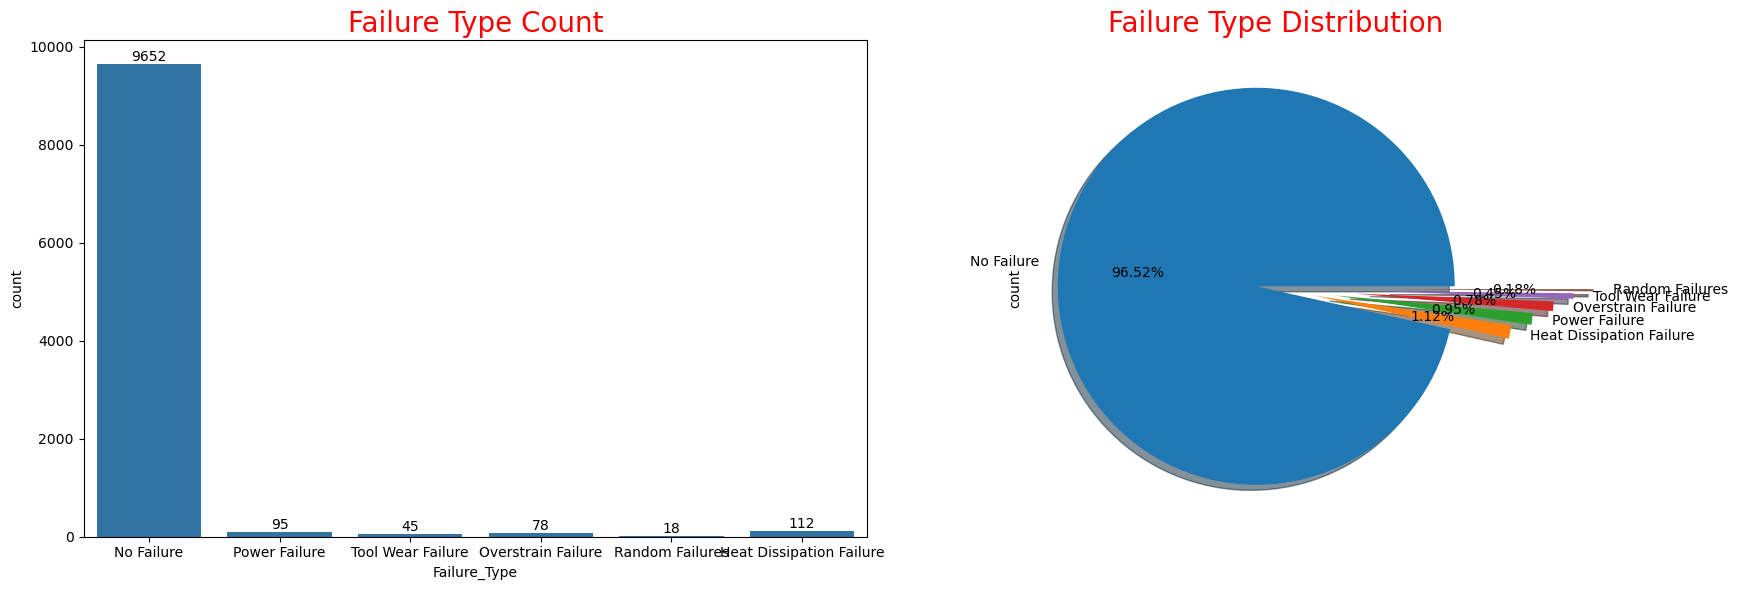

In [175]:
# Create the figure
fig = plt.figure(figsize=(18,6))

# Draw the count chart column
ax1 = plt.subplot(1,2,1)
sns.countplot(x="Failure_Type", data=df, ax=ax1)  # Assign ax1 for the subplot
ax1.bar_label(ax1.containers[0])  # Add labels to the bars
ax1.set_title("Failure Type Count", fontsize=20, color='Red')  # Set title

# Draw the pie chart
ax2 = plt.subplot(1,2,2)
df['Failure_Type'].value_counts().plot.pie(explode=[0.1, 0.2 , 0.3, 0.4, 0.5, 0.6], autopct='%1.2f%%', shadow=True, ax=ax2)  # Use ax2 for pie chart
ax2.set_title("Failure Type Distribution", fontsize=20, color='Red')  # Set title

# Display the plot
plt.tight_layout()
plt.show()


**Draw Failure Type through relation between Torque and Rotational**

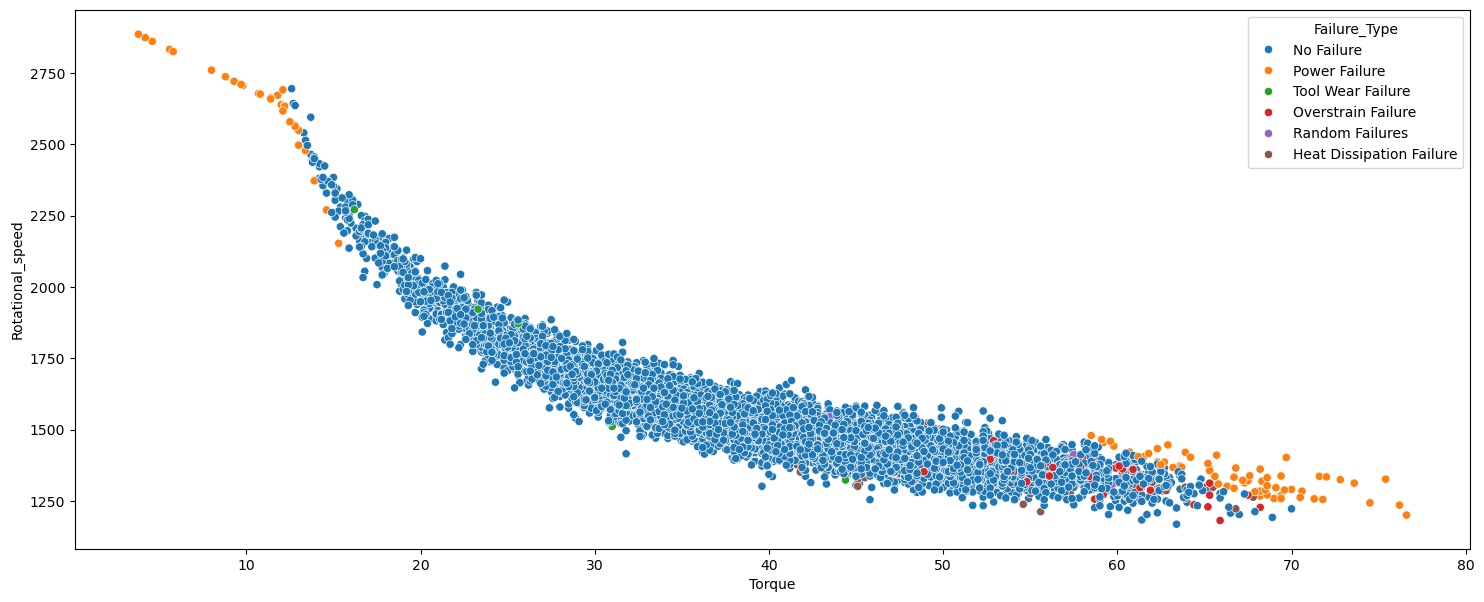

In [177]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Torque", y="Rotational_speed", hue="Failure_Type",palette="tab10");

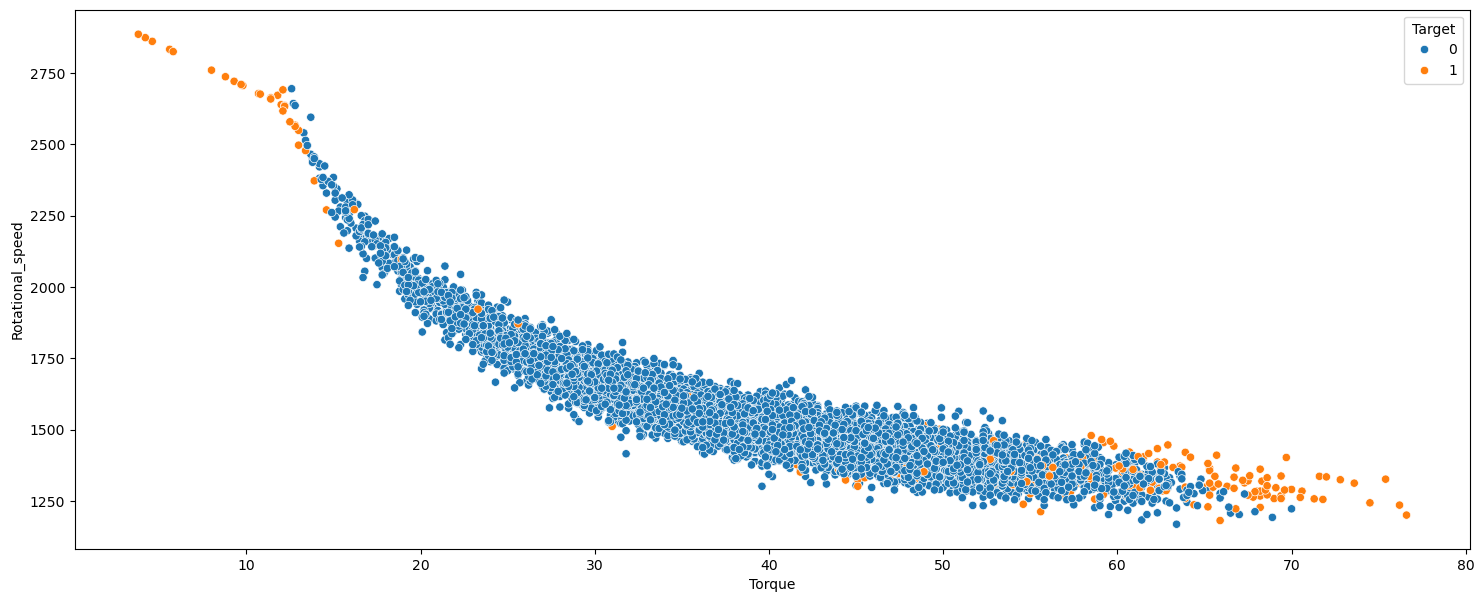

In [178]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Torque", y="Rotational_speed", hue="Target",palette="tab10");

**Draw Failure Type through relation between Air temperature and Process temperature**

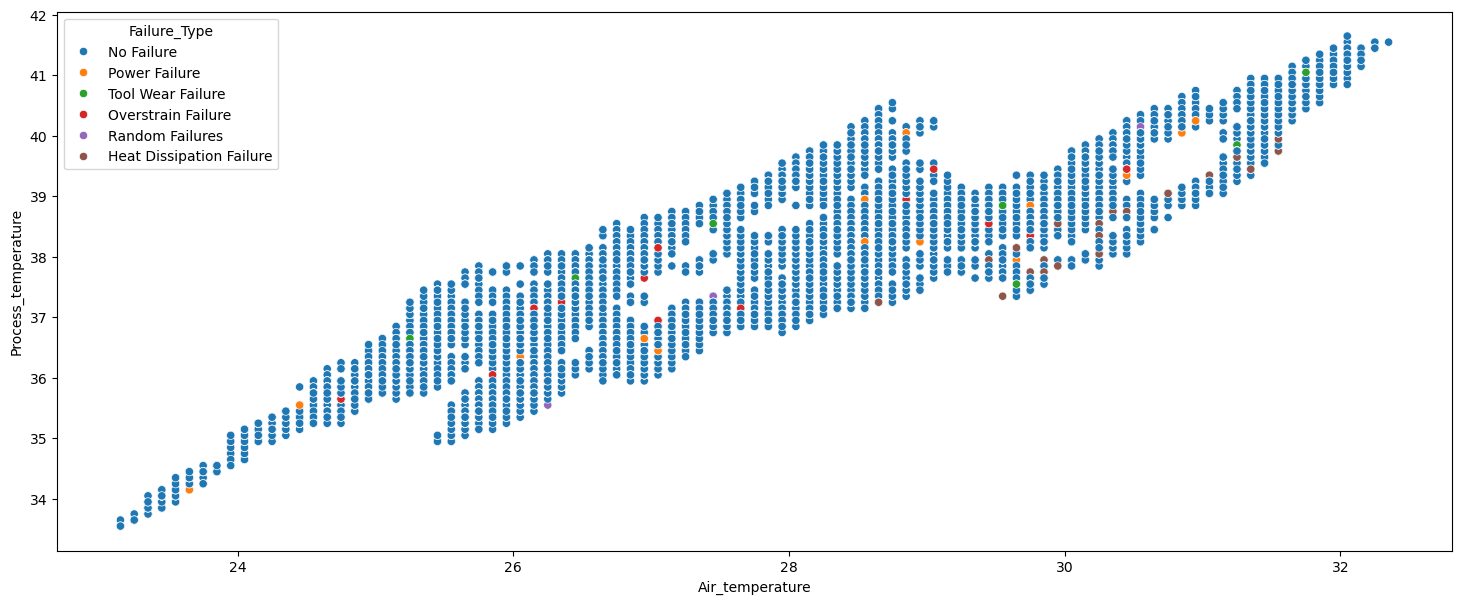

In [179]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Air_temperature", y="Process_temperature", hue="Failure_Type",palette="tab10");

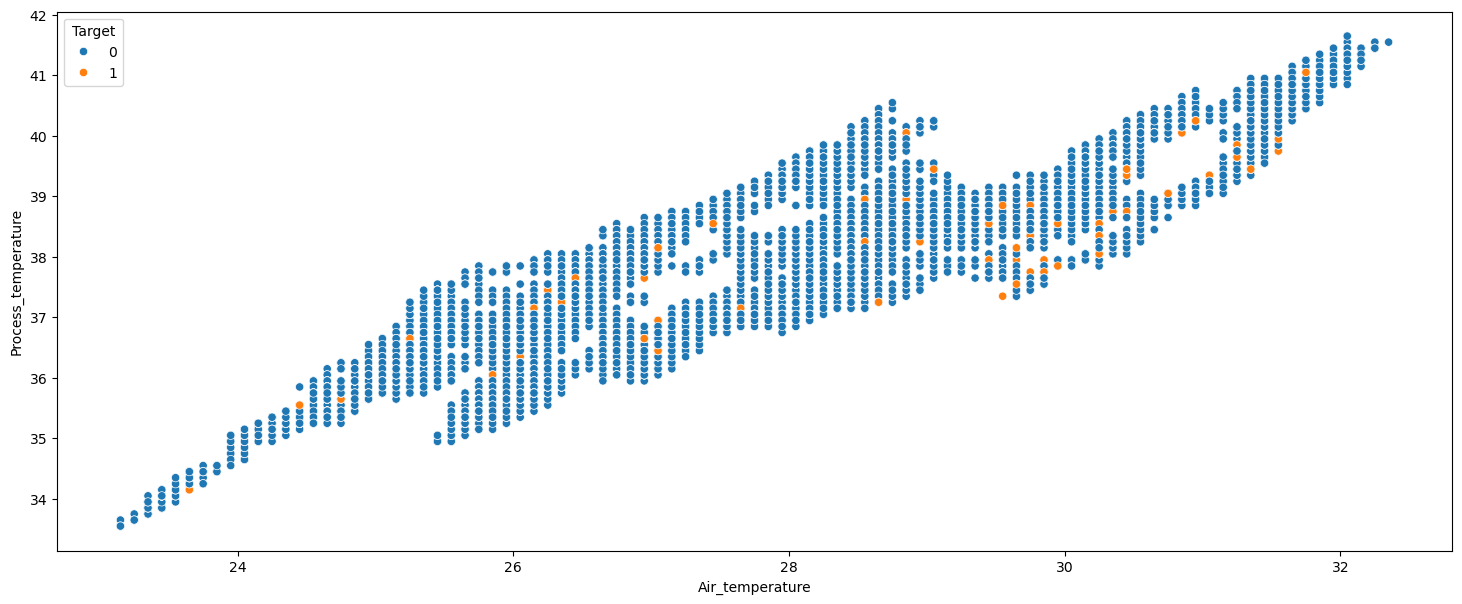

In [180]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Air_temperature", y="Process_temperature", hue="Target",palette="tab10");

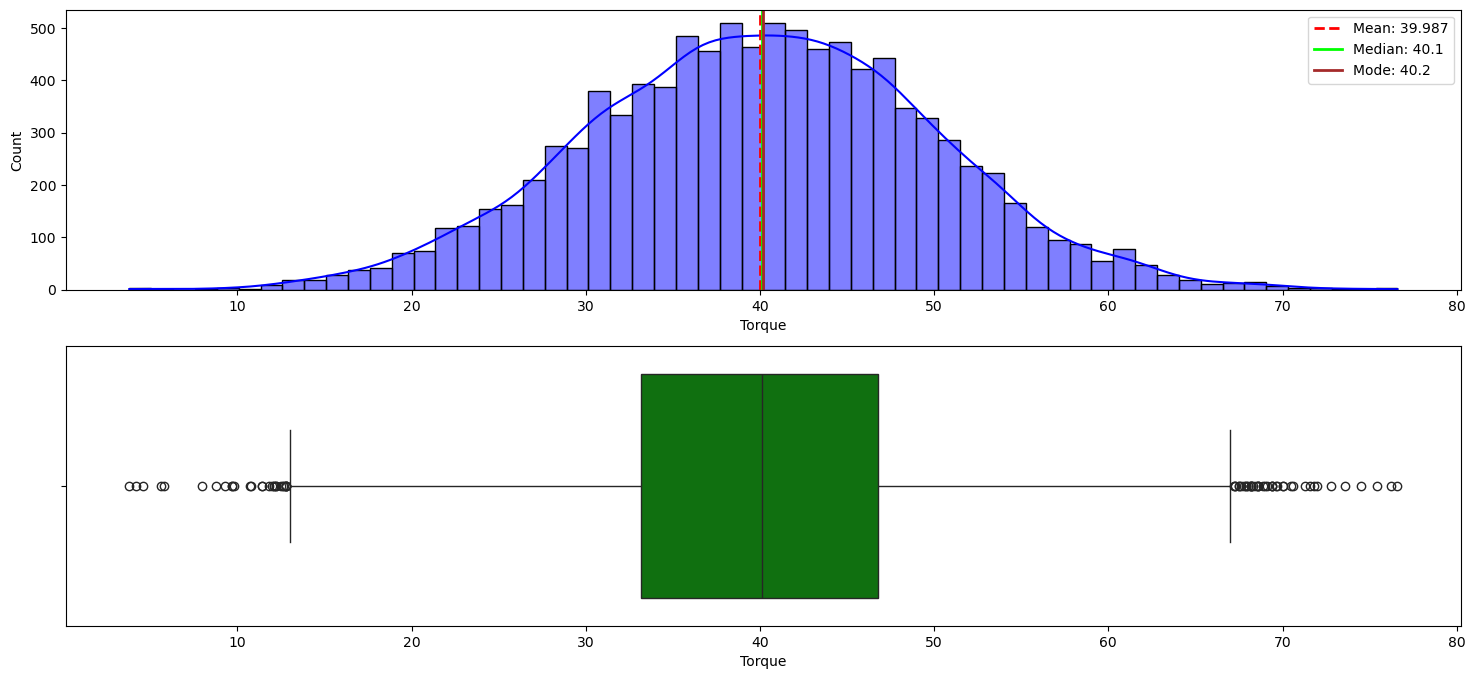

In [181]:
import statistics

def plot_hist(feature):
    fig, ax = plt.subplots(2, 1, figsize=(18, 8))
    
    sns.histplot(data = df[feature], kde = True, ax = ax[0],color='Blue')

    ax[0].axvline(x = df[feature].mean(), color = 'red', linestyle = '--', linewidth = 2, label = 'Mean: {}'.format(round(df[feature].mean(), 3)))
    ax[0].axvline(x = df[feature].median(), color = 'lime', linewidth = 2, label = 'Median: {}'.format(round(df[feature].median(), 3)))
    ax[0].axvline(x = statistics.mode(df[feature]), color = 'brown', linewidth = 2, label = 'Mode: {}'.format(statistics.mode(df[feature])))
    ax[0].legend()
    
    sns.boxplot(x = df[feature], ax = ax[1],color='green')
    
    plt.show()

plot_hist('Torque')

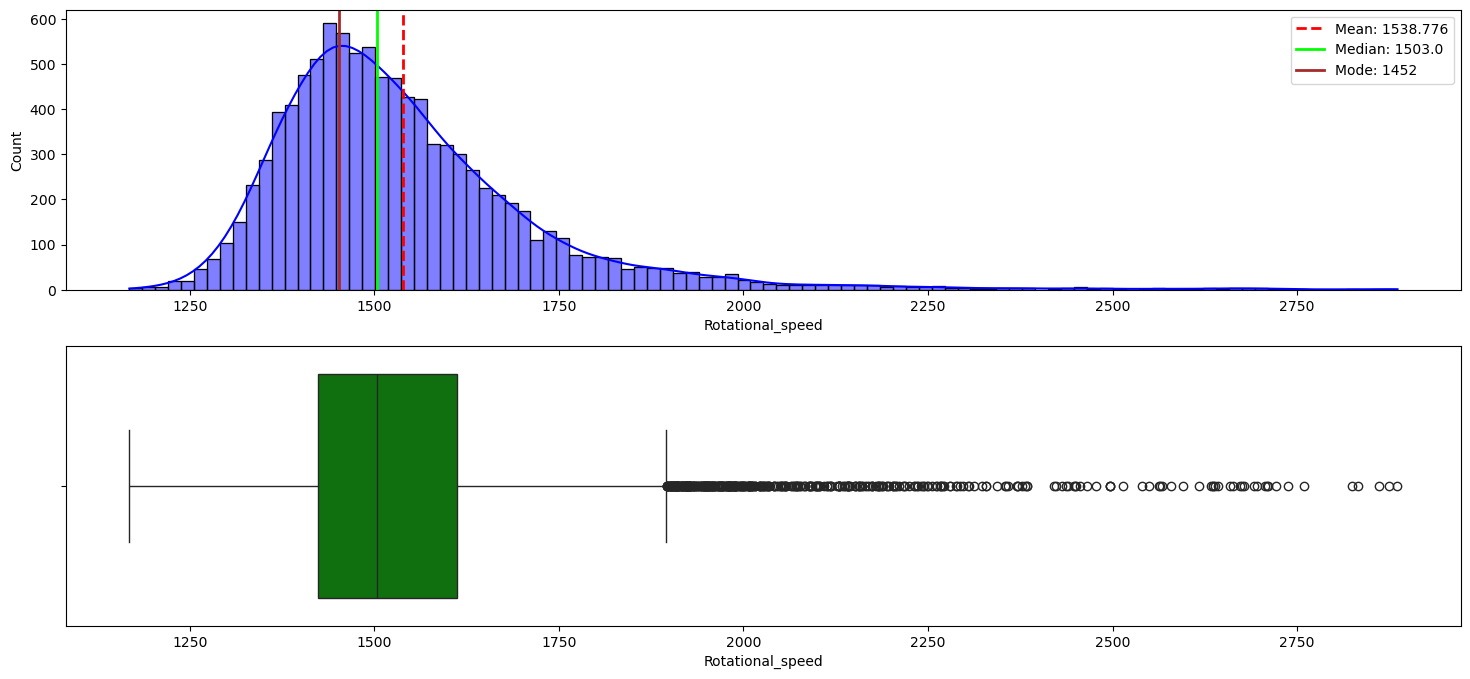

In [183]:
plot_hist('Rotational_speed')

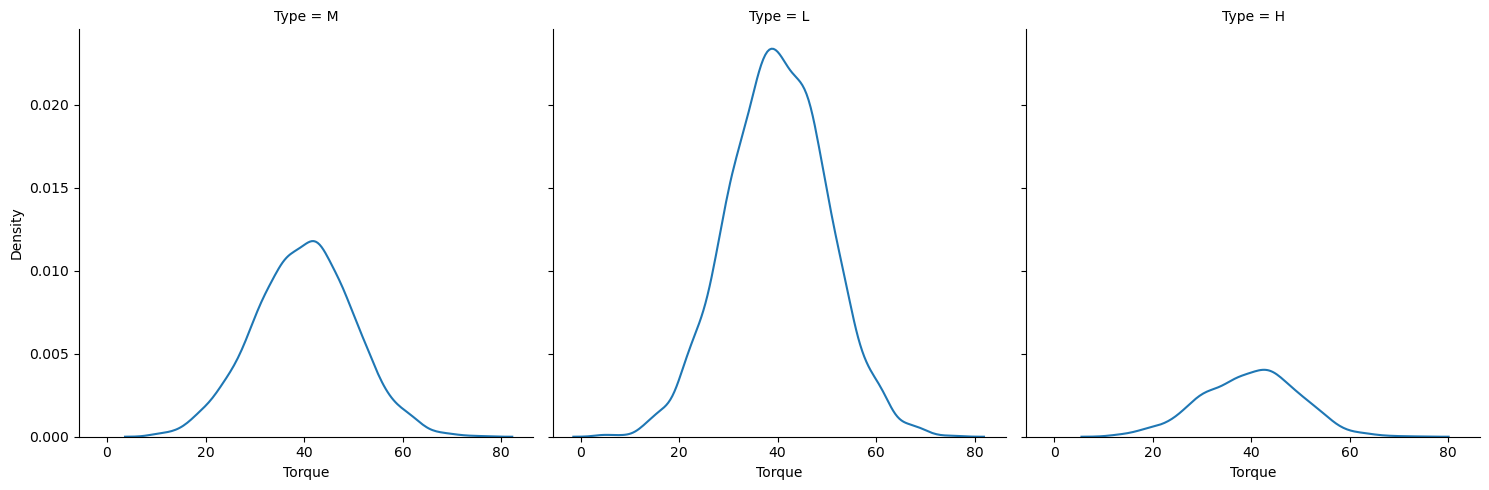

In [184]:
sns.displot(data=df, x='Torque',col="Type", kind="kde") # find density of each type

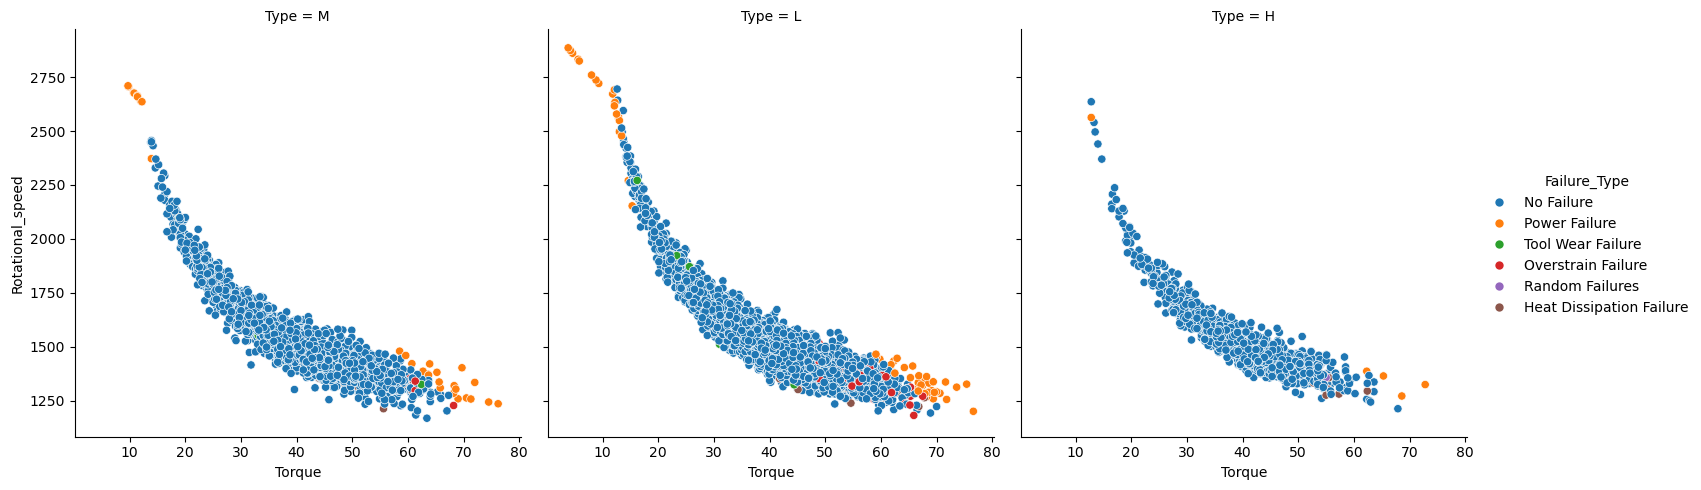

In [185]:
sns.relplot(data=df, x="Torque", y="Rotational_speed", hue="Failure_Type", col='Type', palette='tab10')

<font color="Lime" size=+3 face="Comic Sans MS"><div style="text-align: justify"> Feature Selection </font>

In [187]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Type','Failure_Type'])
df = encoder.fit_transform(df)
df.head(20)


,Type,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Target,Failure_Type,Diff_temperature
0,1,25.95,36.45,1551,42.8,0,0,1,10.5
1,2,26.05,36.55,1408,46.3,3,0,1,10.5
2,2,25.95,36.35,1498,49.4,5,0,1,10.4
3,2,26.05,36.45,1433,39.5,7,0,1,10.4
4,2,26.05,36.55,1408,40.0,9,0,1,10.5
5,1,25.95,36.45,1425,41.9,11,0,1,10.5
6,2,25.95,36.45,1558,42.4,14,0,1,10.5
7,2,25.95,36.45,1527,40.2,16,0,1,10.5
8,1,26.15,36.55,1667,28.6,18,0,1,10.4
9,1,26.35,36.85,1741,28.0,21,0,1,10.5


In [189]:
from sklearn.preprocessing import LabelEncoder
scaler = LabelEncoder()
df['Failure_Type'] = scaler.fit_transform(df['Failure_Type'])

In [190]:
x = df.drop(columns="Failure_Type",axis=1) #get train data
y= df["Failure_Type"] #get label data

In [198]:
x.head(100)

,Type,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Target,Diff_temperature
0,1,25.95,36.45,1551,42.8,0,0,10.5
1,2,26.05,36.55,1408,46.3,3,0,10.5
2,2,25.95,36.35,1498,49.4,5,0,10.4
3,2,26.05,36.45,1433,39.5,7,0,10.4
4,2,26.05,36.55,1408,40.0,9,0,10.5
5,1,25.95,36.45,1425,41.9,11,0,10.5
6,2,25.95,36.45,1558,42.4,14,0,10.5
7,2,25.95,36.45,1527,40.2,16,0,10.5
8,1,26.15,36.55,1667,28.6,18,0,10.4
9,1,26.35,36.85,1741,28.0,21,0,10.5


In [200]:
y.head(1000)

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     1
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     1
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     2
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

In [193]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

<font color="Lime" size=+3 face="Comic Sans MS"><div style="text-align: justify"> RUN WITH MODEL </font>

Decision Tree Model

In [194]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report


model = DecisionTreeClassifier(random_state=21)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)




Accuracy: 0.994
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1933
           1       0.90      0.86      0.88        22
           2       0.88      1.00      0.93         7
           3       0.92      0.79      0.85        14
           4       0.00      0.00      0.00         5
           5       0.95      1.00      0.97        19

    accuracy                           0.99      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.99      0.99      0.99      2000



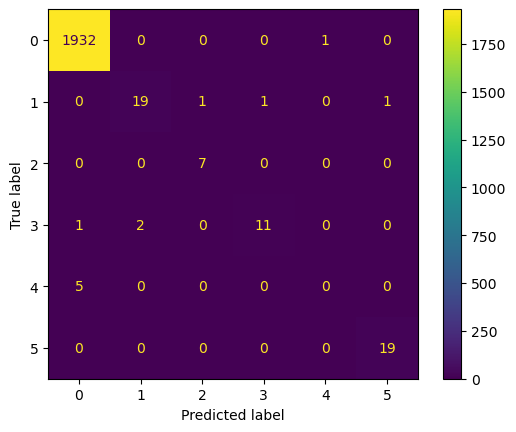

In [195]:
from sklearn import metrics
import matplotlib.pyplot as plt

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()


KNN

In [196]:
from sklearn.neighbors import KNeighborsClassifier

accuracy_train = 0
accuracy_test = 0
c = 1
for i in range(1,100,1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    a= knn.score(x_train,y_train)
    b= knn.score(x_test,y_test)
    
    if accuracy_train==0:
        accuracy_train = a
        accuracy_test = b
    elif accuracy_train < a:
        accuracy_train = a
        accuracy_test = b
        c=i


    
print("k={}NN Accuracy on Train Data: {}".format(c,accuracy_train))
print("k={}NN Accuracy on Test Data: {}".format(c,accuracy_test))



k=1NN Accuracy on Train Data: 1.0
k=1NN Accuracy on Test Data: 0.961


In [197]:
# pickling the model 
import pickle 
pickle_out = open("classifier.pkl", "wb") 
pickle.dump(model, pickle_out) 
pickle_out.close()